## Proyecto 2: Predicción de Infección por Malware

Alexa Bravo  18831  
Abril 22, 2022

In [2]:
#Importamos las librerias a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,roc_curve

### Análisis Exploratorio

##### TRAIN 

In [3]:
#Cargamos los datos de 'train'.
dfTrain = pd.read_csv('train.csv')
dfTrain.head(5)

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [3]:
#Vemos la cantidad total de datos.
print('Total de datos de entrenamiento:', len(dfTrain))

Total de datos de entrenamiento: 8921483


In [4]:
#Vemos la información de los datos. 
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   MachineIdentifier                                  object 
 1   ProductName                                        object 
 2   EngineVersion                                      object 
 3   AppVersion                                         object 
 4   AvSigVersion                                       object 
 5   IsBeta                                             int64  
 6   RtpStateBitfield                                   float64
 7   IsSxsPassiveMode                                   int64  
 8   DefaultBrowsersIdentifier                          float64
 9   AVProductStatesIdentifier                          float64
 10  AVProductsInstalled                                float64
 11  AVProductsEnabled                                 

In [5]:
#Vemos algunos datos estadisticos. 
dfTrain.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8.889165e+06,8.921483e+06,433438.000000,8.885262e+06,8.885262e+06,8.885262e+06,8.921483e+06,8.921483e+06,8.596074e+06,...,8.761350e+06,8.921483e+06,3.261780e+06,8.905530e+06,8.921483e+06,8.921483e+06,8.850140e+06,8.618032e+06,8.618032e+06,8.921483e+06
mean,7.509962e-06,6.845332e+00,1.733378e-02,1658.355421,4.784001e+04,1.326779e+00,1.020967e+00,9.879711e-01,1.080490e+02,8.126653e+04,...,3.302792e+04,4.860229e-01,3.065811e-07,7.039446e-03,1.255431e-01,3.807091e-02,5.741920e-02,2.835785e-01,7.883565e+00,4.997927e-01
std,2.740421e-03,1.026055e+00,1.305118e-01,998.960373,1.403237e+04,5.229272e-01,1.675544e-01,1.090149e-01,6.304706e+01,4.892339e+04,...,2.120691e+04,4.998046e-01,5.536976e-04,8.360558e-02,3.313338e-01,1.913675e-01,2.326419e-01,4.507347e-01,4.550121e+00,5.000000e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,...,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,7.000000e+00,0.000000e+00,788.000000,4.948000e+04,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+01,3.682500e+04,...,1.315600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,7.000000e+00,0.000000e+00,1632.000000,5.344700e+04,1.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,8.237300e+04,...,3.307000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
75%,0.000000e+00,7.000000e+00,0.000000e+00,2373.000000,5.344700e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.620000e+02,1.237000e+05,...,5.243600e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00
max,1.000000e+00,3.500000e+01,1.000000e+00,3213.000000,7.050700e+04,7.000000e+00,5.000000e+00,1.000000e+00,2.220000e+02,1.679620e+05,...,7.210500e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,1.000000e+00


##### TEST

In [4]:
#Cargamos los datos de 'test'.
dfTest = pd.read_csv('test.csv')
dfTest.head(5)

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,...,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,...,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,...,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,...,628.0,26320.0,1,0.0,0.0,0,0,0.0,0.0,10.0
4,00000574cefffeca83ec8adf9285b2bf,win8defender,1.1.15400.4,4.18.1809.2,1.279.236.0,0,7.0,0,NaN,53447.0,...,556.0,63269.0,1,NaN,0.0,0,0,0.0,1.0,3.0


In [7]:
#Vemos la cantidad total de datos.
print('Total de datos de prueba:', len(dfTest))

Total de datos de prueba: 7853253


In [8]:
#Vemos la información de los datos. 
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   MachineIdentifier                                  object 
 1   ProductName                                        object 
 2   EngineVersion                                      object 
 3   AppVersion                                         object 
 4   AvSigVersion                                       object 
 5   IsBeta                                             int64  
 6   RtpStateBitfield                                   float64
 7   IsSxsPassiveMode                                   int64  
 8   DefaultBrowsersIdentifier                          float64
 9   AVProductStatesIdentifier                          float64
 10  AVProductsInstalled                                float64
 11  AVProductsEnabled                                 

In [9]:
#Vemos algunos datos estadisticos. 
dfTrain.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8.889165e+06,8.921483e+06,433438.000000,8.885262e+06,8.885262e+06,8.885262e+06,8.921483e+06,8.921483e+06,8.596074e+06,...,8.761350e+06,8.921483e+06,3.261780e+06,8.905530e+06,8.921483e+06,8.921483e+06,8.850140e+06,8.618032e+06,8.618032e+06,8.921483e+06
mean,7.509962e-06,6.845332e+00,1.733378e-02,1658.355421,4.784001e+04,1.326779e+00,1.020967e+00,9.879711e-01,1.080490e+02,8.126653e+04,...,3.302792e+04,4.860229e-01,3.065811e-07,7.039446e-03,1.255431e-01,3.807091e-02,5.741920e-02,2.835785e-01,7.883565e+00,4.997927e-01
std,2.740421e-03,1.026055e+00,1.305118e-01,998.960373,1.403237e+04,5.229272e-01,1.675544e-01,1.090149e-01,6.304706e+01,4.892339e+04,...,2.120691e+04,4.998046e-01,5.536976e-04,8.360558e-02,3.313338e-01,1.913675e-01,2.326419e-01,4.507347e-01,4.550121e+00,5.000000e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,...,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,7.000000e+00,0.000000e+00,788.000000,4.948000e+04,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+01,3.682500e+04,...,1.315600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,7.000000e+00,0.000000e+00,1632.000000,5.344700e+04,1.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,8.237300e+04,...,3.307000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
75%,0.000000e+00,7.000000e+00,0.000000e+00,2373.000000,5.344700e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.620000e+02,1.237000e+05,...,5.243600e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00
max,1.000000e+00,3.500000e+01,1.000000e+00,3213.000000,7.050700e+04,7.000000e+00,5.000000e+00,1.000000e+00,2.220000e+02,1.679620e+05,...,7.210500e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,1.000000e+00


### Pre-procesamiento

##### TRAIN

In [10]:
#Vemos las columnas con datos faltantes y con muchos ceros
dfTrain.isna().sum().to_frame()

,0
MachineIdentifier,0
ProductName,0
EngineVersion,0
AppVersion,0
AvSigVersion,0
...,...
Census_IsPenCapable,0
Census_IsAlwaysOnAlwaysConnectedCapable,71343
Wdft_IsGamer,303451
Wdft_RegionIdentifier,303451


In [5]:
#Eliminamos las columnas que no nos sirven. 
dfTrain = dfTrain.drop(columns=['IsBeta','IsSxsPassiveMode','AutoSampleOptIn', 'SMode','Census_HasOpticalDiskDrive','Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled',
     'Census_IsVirtualDevice','Census_IsTouchEnabled', 'Census_IsPenCapable','Census_IsAlwaysOnAlwaysConnectedCapable', 'MachineIdentifier', 'DefaultBrowsersIdentifier',
     'PuaMode','Census_ProcessorClass', 'Census_InternalBatteryType','Census_IsFlightingInternal', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'OsVer', 'OsBuildLab',
     'SmartScreen', 'Census_ChassisTypeName', 'Census_OSVersion', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName'], axis = 1)

In [6]:
#Quitamos los datos tipo 'object'.
dfTrain = dfTrain.select_dtypes(exclude=["object_"])

In [7]:
#Llenamos los N/A con 0. 
dfTrain = dfTrain.fillna(0)

In [8]:
#Función para dejar con un decimal los datos 'float'.
# https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
def limpiaFloats(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [9]:
#Aplicamos la función anterior a nuestro dataset. 
dfTrain = limpiaFloats(dfTrain)

In [9]:
#Observamos nuestros nuevo dataset
dfTrain.head(5)

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,7.0,53447.0,1.0,1.0,1.0,29.0,128035.0,18.0,35.0,171.0,...,26.0,119.0,0.0,628.0,36144.0,0.0,0.0,0.0,10.0,0.0
1,7.0,53447.0,1.0,1.0,1.0,93.0,1482.0,18.0,119.0,64.0,...,8.0,31.0,0.0,628.0,57858.0,0.0,0.0,0.0,8.0,0.0
2,7.0,53447.0,1.0,1.0,1.0,86.0,153579.0,18.0,64.0,49.0,...,7.0,30.0,0.0,142.0,52682.0,0.0,0.0,0.0,3.0,0.0
3,7.0,53447.0,1.0,1.0,1.0,88.0,20710.0,0.0,117.0,115.0,...,17.0,64.0,0.0,355.0,20050.0,0.0,0.0,0.0,3.0,1.0
4,7.0,53447.0,1.0,1.0,1.0,18.0,37376.0,0.0,277.0,75.0,...,8.0,31.0,0.0,355.0,19844.0,0.0,0.0,0.0,1.0,1.0


##### TEST

In [14]:
#Vemos las columnas con datos faltantes y con muchos ceros
dfTest.isna().sum().to_frame()

,0
MachineIdentifier,0
ProductName,0
EngineVersion,0
AppVersion,0
AvSigVersion,0
...,...
Census_IsTouchEnabled,0
Census_IsPenCapable,0
Census_IsAlwaysOnAlwaysConnectedCapable,90152
Wdft_IsGamer,302857


In [10]:
#Eliminamos las columnas que no nos sirven. 
dfTest = dfTest.drop(columns=['IsBeta','IsSxsPassiveMode','AutoSampleOptIn', 'SMode','Census_HasOpticalDiskDrive','Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled',
     'Census_IsVirtualDevice','Census_IsTouchEnabled', 'Census_IsPenCapable','Census_IsAlwaysOnAlwaysConnectedCapable', 'MachineIdentifier', 'DefaultBrowsersIdentifier',
     'PuaMode','Census_ProcessorClass', 'Census_InternalBatteryType','Census_IsFlightingInternal', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'OsVer', 'OsBuildLab',
     'SmartScreen', 'Census_ChassisTypeName', 'Census_OSVersion', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName'], axis = 1)

In [11]:
#Quitamos los datos tipo 'Object'. 
dfTest = dfTest.select_dtypes(exclude=["object_"])

In [12]:
#Llenamos los N/A con 0. 
dfTest = dfTest.fillna(0)

In [13]:
#Función para dejar con un decimal los datos 'float'.
#https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
def limpiaFloats(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [14]:
#Aplicamos la función a nuestro dataset. 
dfTest = limpiaFloats(dfTest)

In [15]:
#Observamos nuestros nuevo dataset
dfTest.head(5)

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,...,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Wdft_IsGamer,Wdft_RegionIdentifier
0,7.0,53447.0,1.0,1.0,1.0,43.0,58552.0,18.0,53.0,42.0,...,1387.0,37.0,158.0,0.0,807.0,8554.0,1.0,0.0,0.0,7.0
1,7.0,53447.0,1.0,1.0,1.0,68.0,71395.0,0.0,276.0,74.0,...,611.0,7.0,30.0,0.0,554.0,33105.0,1.0,0.0,1.0,12.0
2,7.0,49480.0,2.0,1.0,1.0,201.0,66202.0,0.0,267.0,251.0,...,2189.0,35.0,148.0,0.0,556.0,63396.0,1.0,0.0,1.0,11.0
3,7.0,42160.0,2.0,1.0,1.0,29.0,120917.0,0.0,35.0,171.0,...,371.0,26.0,119.0,0.0,628.0,26320.0,1.0,0.0,0.0,10.0
4,7.0,53447.0,1.0,1.0,1.0,171.0,124736.0,18.0,211.0,182.0,...,371.0,29.0,125.0,0.0,556.0,63269.0,1.0,0.0,1.0,3.0


In [15]:
dfTrain = dfTrain.sample(frac=1/900)

### Selección de Caracteristicas 

In [17]:
#Seleccionamos y separamos en 'x' y 'y' los datos que vamos a utilizar en los modelos. 
x = dfTrain.drop('HasDetections', axis=1)
y = dfTrain['HasDetections']

In [18]:
#Separamos los datos, en train con el 55% y test con el 45%. 
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.45, random_state=123)

In [19]:
#Separamos los datos en train, test y validation para obtener mejores resultados, quedando 55% train, 30% test y 15% validation.  
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.6666, random_state=123) 

In [20]:
#Escalamos los datos. 
dataS = StandardScaler()
xTrain = dataS.fit_transform(xTrain)
xTest = dataS.transform(xTest)
xVal = dataS.transform(xVal)

In [21]:
#Normalizamos los datos. 
xTrain = normalize(xTrain)
xTest = normalize(xTest)
xVal = normalize(xVal)

### MODELOS

In [47]:
#Creamos una función para hacer nuestras gráficas ROC. 
#https://www.delftstack.com/es/howto/python/plot-roc-curve-python/
def roc(model, xTest, yTest, name):
    n_classes = 2
    fpr = dict()
    tpr = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(yTest, model.predict_proba(xTest)[:,i], pos_label=i)
    plt.plot(fpr[0], tpr[0], color='blue', linestyle='--', label='Negative Malware')
    plt.plot(fpr[1], tpr[1], color='red', linestyle='--', label='Positive Malware')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

#### Modelo 1: Random Forest

In [23]:
#Definimos el modelo.
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
modeloRM = RandomForestClassifier(max_depth=2,random_state=0)
modeloRM.fit(xTrain, yTrain)

RandomForestClassifier(max_depth=2, random_state=0)

In [24]:
#Calculamos la matriz de confusión.
yPred = modeloRM.predict(xTest)
print(confusion_matrix(yTest, yPred))

[[93 43]
 [89 73]]


In [25]:
#Calculamos el Accuracy
print('Test Accuracy:', accuracy_score(yTest, yPred))

Test Accuracy: 0.5570469798657718


In [26]:
#Vemos el reporte de los resultados.
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

         0.0       0.51      0.68      0.58       136
         1.0       0.63      0.45      0.53       162

    accuracy                           0.56       298
   macro avg       0.57      0.57      0.56       298
weighted avg       0.58      0.56      0.55       298



In [27]:
#Calculamos la matriz de confusión.
yPred = modeloRM.predict(xVal)
print(confusion_matrix(yVal, yPred))

[[46 18]
 [42 42]]


In [28]:
#Calculamos el Accuracy
print('Validation Accuracy:', accuracy_score(yVal, yPred))

Validation Accuracy: 0.5945945945945946


In [29]:
#Vemos el reporte de los resultados.
print(classification_report(yVal, yPred))

              precision    recall  f1-score   support

         0.0       0.52      0.72      0.61        64
         1.0       0.70      0.50      0.58        84

    accuracy                           0.59       148
   macro avg       0.61      0.61      0.59       148
weighted avg       0.62      0.59      0.59       148



##### KFolds

In [30]:
cvKF = cross_val_score(modeloRM, x, y, cv=10)
cvKF

array([0.56      , 0.65656566, 0.54545455, 0.61616162, 0.68686869,
       0.55555556, 0.57575758, 0.60606061, 0.5959596 , 0.6969697 ])

##### Gráfica ROC

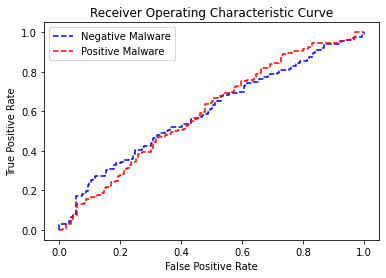

In [33]:
roc(modeloRM, xTest, yTest, 'ROC-RF')

#### Modelo 2: Desition Tree

In [34]:
from sklearn import tree
modelodtc = tree.DecisionTreeClassifier()
modelodtc.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [35]:
#Calculamos la matriz de confusión.
yPred = modelodtc.predict(xTest)
print(confusion_matrix(yTest, yPred))

[[74 62]
 [74 88]]


In [36]:
#Calculamos el Accuracy
print('Test Accuracy:', accuracy_score(yTest, yPred))

Test Accuracy: 0.5436241610738255


In [37]:
#Vemos el reporte de los resultados.
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

         0.0       0.50      0.54      0.52       136
         1.0       0.59      0.54      0.56       162

    accuracy                           0.54       298
   macro avg       0.54      0.54      0.54       298
weighted avg       0.55      0.54      0.54       298



In [39]:
#Calculamos la matriz de confusión.
yPred = modelodtc.predict(xVal)
print(confusion_matrix(yVal, yPred))

[[35 29]
 [38 46]]


In [40]:
#Calculamos el Accuracy
print('Validation Accuracy:', accuracy_score(yVal, yPred))

Validation Accuracy: 0.5472972972972973


In [41]:
#Vemos el reporte de los resultados.
print(classification_report(yVal, yPred))

              precision    recall  f1-score   support

         0.0       0.48      0.55      0.51        64
         1.0       0.61      0.55      0.58        84

    accuracy                           0.55       148
   macro avg       0.55      0.55      0.54       148
weighted avg       0.56      0.55      0.55       148



##### KFolds

In [42]:
cvKF = cross_val_score(modelodtc, x, y, cv=10)
cvKF

array([0.51      , 0.50505051, 0.4040404 , 0.47474747, 0.60606061,
       0.47474747, 0.50505051, 0.5959596 , 0.51515152, 0.48484848])

##### Gráfica ROC

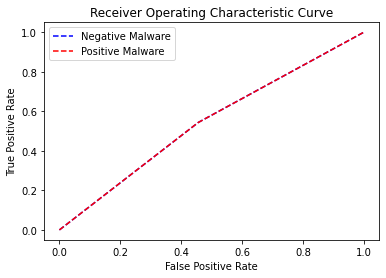

In [48]:
roc(modelodtc, xTest, yTest, 'ROC-DT')

#### Modelo 3: Support Vector Machine

In [ ]:
#Definimos el modelo. 
from sklearn.svm import SVC
modeloSVC = SVC(kernel='linear', probability=True)
modeloSVC.fit(xTrain, yTrain)

In [ ]:
#Calculamos la matriz de confusión.
yPred = modeloSVC.predict(xTest)
print(confusion_matrix(yTest, yPred))

In [67]:
#Calculamos el Accuracy
print('Test Accuracy:', accuracy_score(yTest, yPred))

Test Accuracy: 0.5838926174496645


In [68]:
#Vemos el reporte de los resultados.
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

         0.0       0.54      0.62      0.58       136
         1.0       0.64      0.55      0.59       162

    accuracy                           0.58       298
   macro avg       0.59      0.59      0.58       298
weighted avg       0.59      0.58      0.58       298



In [69]:
#Calculamos la matriz de confusión.
yPred = modeloSVC.predict(xVal)
print(confusion_matrix(yVal, yPred))

[[35 29]
 [45 39]]


Validation Accuracy: 0.5
